In [1]:
import pandas as  pd

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scipy
from scipy.stats import iqr
from scipy.stats import pearsonr

df= pd.read_csv("salary.csv")
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### 1.1 Number of responders

In [2]:
print('Number of responsers are : ',len(df))

Number of responsers are :  514


### 1.2. Missing values

In [3]:
null_values= df.isnull().sum()
null_values


salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [4]:
null = df[df.salary.isnull()]
null

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [5]:
print('There is 1 missing value at entry 208')


There is 1 missing value at entry 208


### 2. Lowest and highest salary

In [6]:
min_sal= min(df['salary'])
print('Minimum salary is ', min_sal)

Minimum salary is  29000.0


In [7]:
max_sal= max(df['salary'])
print('Maximum salary is ', max_sal)

Maximum salary is  96156.0


### 3. Mean salary and its standard error

In [8]:
print("On average, the expected salary is ", np.nanmean(df['salary']))

On average, the expected salary is  50863.22009783626


In [9]:
err_mean_salary = df["salary"].sem()

print("The  standard error mean salary for the sample is: ",err_mean_salary)


The  standard error mean salary for the sample is:  560.0622753925232


### 4. Standard Deviation: Years Worked

In [10]:
print('The standard deviation for years worked is ', np.nanstd(df['yearsworked']))

The standard deviation for years worked is  9.435503224576884


### 5. Median salary

In [22]:
print('Median salary for this data set is ', np.median(df['salary']))


Median salary for this data set is  50165.5


### 6. Interquatile range for salary

In [23]:
q75, q25 = np.percentile(df['salary'], [75 ,25])
iqr = q75 - q25
print('InterQuartile Range for salaries is ', iqr)

InterQuartile Range for salaries is  20306.25


### 7. Number of males and females in the sample

In [13]:
df =df.rename(columns ={'male':'gender'})
df.gender = ['male' if i == 1
                  else
                  'female' for i in df.gender]
gender = pd.DataFrame(df.groupby('gender').size()).reset_index()
gender = gender.rename(columns={0:'number'})
gender

,gender,number
0,female,128
1,male,386


### 8. Number of women in executive position compared to men

In [14]:
num_to_word = {
    1:'Jnr_employee',
    2: 'manager',
    3:'executive'
}
df['position'] = df['position'].map(num_to_word)
position = df.position.value_counts()
position

executive       211
manager         160
Jnr_employee    143
Name: position, dtype: int64

In [15]:

females = df[df.gender == 'female']
males = df[df.gender == 'male']
female_executive = len(females[females.position == 'executive'])
male_executive = len(males[males.position == 'executive'])
print('The number of female in executive position is: ',female_executive)
print('The number of male in executive position is: ',male_executive)

The number of female in executive position is:  19
The number of male in executive position is:  192


There are 173 less females in the executive position than there are males.

### 9. Histogram for variable salary

/home/recruit/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/recruit/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


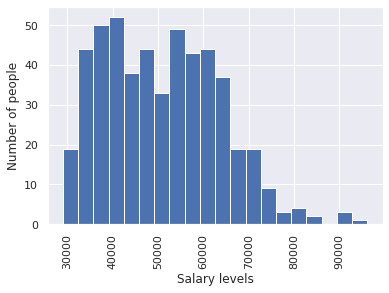

In [16]:
sns.set()
plt.hist(x= df.salary, bins=20)
plt.xlabel('Salary levels')
plt.xticks(rotation= 90, horizontalalignment='center')
plt.ylabel('Number of people')
plt.show()

#### 10.

The variable salary spreads from R30000 to R90000 and  follows a normal distribution. It is skewed to the right. Most of the data points are centered around the mean of R50863.22. We experience outliers with salaries over R90 000.

### 11.

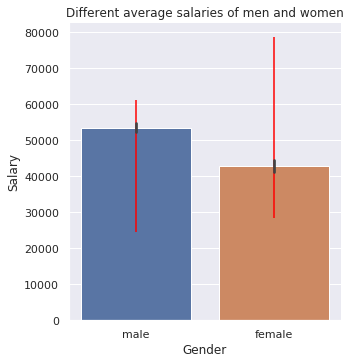

In [17]:
mean = df.groupby('gender')['salary'].mean()
std = df.groupby('gender')['salary'].std()
sns.set()
sns.catplot(x = 'gender', y= 'salary', data= df, kind='bar')
# Error bars at 95% interval
plt.errorbar(mean.index, mean, yerr=2*std, linestyle='', color="red")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title('Different average salaries of men and women')
plt.show()

On average, men tend to earn more than women. This could imply that the males' salaries are the driver of the average salary of the data set. This means that, the reason why the mean salary is so high is because men earn more and does not necesarrily mean that women are in the same league as them. The different means per gender are diplayed below:

In [18]:
print('Mean values for different genders in the figure above are: ')
mean

Mean values for different genders in the figure above are: 


gender
female    42916.604797
male      53505.211678
Name: salary, dtype: float64

### 12. Relationship between years worked and salary

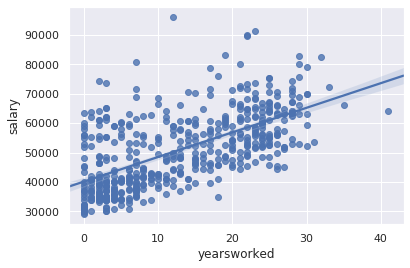

In [19]:
sns.set()
sns.regplot(x='yearsworked', y='salary', data=df)
plt.show()

### 12.1 Relationship between years worked and salary

There is a positive relationship between the variables which means the more years a person is employed, the higher their salary is expected to be.

### 12.2 Pattern 

Relationship is linear with a positive slope and shows a weak relationship(flatter slope).


### 12.3 Unusual and extreme data points

Yes there are outliers in the data. These are data points that contravene the assumption drawn in **12.1** above. These are observations that have worked few years but earn more and those who have worked longer years but earns less.

##### 1. Worked few years but earn more
An assumption here is that these people have higher qualifications and as a result they went up the corporate ladder very rapidly and hold executive positions resulting in higher salaries.

##### 2. worked longer years but earns less
People with less qualifications tend to not move up the corporate ladder fast but will stay with a company for longer because of lack of opportunities relavant to them. An example will be a cleaner or a general worker.

### 13. P-value and Correlation Coeffiecient 

In [34]:

df['salary']=df.fillna(0)
a =scipy.pearsonr(df.salary,df.yearsworked)
a

(0.6231354820920552, 1.2747795189693407e-56)

**R = 0.6231** Means there is a positive linear relationship     

**R > 0.5** means that there is positive correlation between the two variables 

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0which shows a strong positive relationship between the two variables.

The p_value is too small to suggest the evidence that the relationship between the variables is statistically significant since it is smaller than the threshold of the P_value of p= 0.05.